## Market Price Estimate Model Prediction

dataset from "https://www.kaggle.com/datasets/febinphilips/us-house-listings-2023?select=cleaned_df.csv"

In the scope of this project, I will conduct an in-depth exploration of a Zillow house dataset encompassing listing information from all 50 American states. Despite the dataset being "cleaned," certain rows still consist missing values in the 'Market Estimate' and 'Rent Estimate' columns, due to Zillow's lack of information for those sp listings. 

The primary goal of this project is to contruct and figure out what factors affect the linear regression model aimed at predicting the Market Estimate price.I will employ various strategies to enhance the model's accuracy. First, I will build a simple linear regression model where the Area predicts the Market Estimate Price. Then, I will look at the impact of outlier removal and see how that effects the model's predictive accuracy. Lastly, I will incoorporate additional features, namely the Bedroom, Bathroom, and PricePerSqft columns, into the model to see the changes in the predictions. This multi step approach uncovers insights into the nuances of the dataset and helps me understand the model's resilience to different preprocessing techniques.

Import statements and loading the dataset

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [138]:
df = pd.read_csv("/Users/charikajangili/Downloads/archive/cleaned_df.csv")
df.head()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.4+ MB


Filtering the dataset for the purposes of this project

In [140]:
data = df.loc[(df["MarketEstimate"]> 0)]
data

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0
5,AL,Montgomery,Brampton Ln,36117.0,3.0,2.0,1564.0,96.547315,0.2000,150500.0,1385.0,32.372746,-86.165115,151000.0
6,AL,Boaz,Greenwood Ave,35957.0,3.0,2.0,1717.0,139.196273,0.3800,238400.0,2125.0,34.210014,-86.136690,239000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22674,WY,Douglas,Bar Two Dr,82633.0,3.0,3.0,2316.0,133.851468,0.1500,306700.0,1724.0,42.756350,-105.399580,310000.0
22675,WY,Riverton,Riverview Rd,82501.0,3.0,3.0,2400.0,77.083333,3.3500,184500.0,1999.0,43.077744,-108.558960,185000.0
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0


In [141]:
data.drop(columns=["Latitude","Longitude"], inplace=True)

### Data Cleaning

In [142]:
data.isna().sum()

State               0
City                0
Street              0
Zipcode             0
Bedroom             5
Bathroom           20
Area                0
PPSq                0
LotArea           529
MarketEstimate      0
RentEstimate       48
ListedPrice         0
dtype: int64

Cleaning columns I will be using for the models

In [143]:
data.dropna(subset=["Bedroom", "Bathroom"], how="any", inplace=True)

In [144]:
data.shape

(15423, 12)

Renaming "PPSq" for better understanding of the column

In [145]:
data.rename(columns={"PPSq" : "PricePerSqft"}, inplace=True)

Changing dtypes

In [146]:
data["Zipcode"] = data["Zipcode"].astype(str)
data["Bedroom"] = data["Bedroom"].astype(int)

Rounding to reflect monetary values

In [147]:
data["PricePerSqft"] = data["PricePerSqft"].round(2)
data

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PricePerSqft,LotArea,MarketEstimate,RentEstimate,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4,2.0,1614.0,148.64,0.3805,240600.0,1599.0,239900.0
3,AL,Chelsea,Mallet Way,35043.0,3,3.0,2224.0,150.63,0.2600,336200.0,1932.0,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3,2.0,1225.0,204.08,NaN,222700.0,1679.0,250000.0
5,AL,Montgomery,Brampton Ln,36117.0,3,2.0,1564.0,96.55,0.2000,150500.0,1385.0,151000.0
6,AL,Boaz,Greenwood Ave,35957.0,3,2.0,1717.0,139.20,0.3800,238400.0,2125.0,239000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22674,WY,Douglas,Bar Two Dr,82633.0,3,3.0,2316.0,133.85,0.1500,306700.0,1724.0,310000.0
22675,WY,Riverton,Riverview Rd,82501.0,3,3.0,2400.0,77.08,3.3500,184500.0,1999.0,185000.0
22676,WY,Burns,Road 210a,82053.0,2,1.0,1112.0,337.23,20.0000,368600.0,1500.0,375000.0
22679,WY,Cheyenne,Carolina Rd,82009.0,3,2.0,2930.0,196.55,6.2300,558000.0,2749.0,575900.0


In [148]:
pd.unique(data["Bathroom"]).tolist()

[2.0,
 3.0,
 1.0,
 4.0,
 5.0,
 6.0,
 0.0,
 2.5,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 1.5,
 1.75,
 0.75,
 3.5,
 4.5,
 13.0,
 10.0,
 14.0,
 3.0999999046325684,
 2.0999999046325684,
 1.100000023841858,
 4.099999904632568,
 2.200000047683716,
 1.2000000476837158]

In [149]:
data["Bathroom"] == data["Bathroom"].replace(0.75, 1, inplace=True)
data["Bathroom"] == data["Bathroom"].replace(1.75, 2, inplace=True)
data["Bathroom"].astype(int)

0        2
3        3
4        2
5        2
6        2
        ..
22674    3
22675    3
22676    1
22679    2
22680    3
Name: Bathroom, Length: 15423, dtype: int64

In [150]:
data.describe()

,Bedroom,Bathroom,Area,PricePerSqft,LotArea,MarketEstimate,RentEstimate,ListedPrice
count,15423.000000,15423.000000,15423.000000,15423.000000,14895.000000,1.542300e+04,15375.000000,1.542300e+04
mean,3.401089,2.426221,2106.492382,220.707336,2.052317,4.819454e+05,2636.429919,4.931051e+05
std,0.995348,1.076653,1211.863018,185.705792,12.879956,1.000828e+06,3628.106895,1.088933e+06
min,0.000000,0.000000,240.000000,5.880000,0.000000,1.570000e+04,155.000000,1.490000e+04
25%,3.000000,2.000000,1408.000000,134.470000,0.177146,2.306500e+05,1686.500000,2.350000e+05
50%,3.000000,2.000000,1860.000000,184.230000,0.290300,3.419000e+05,2197.000000,3.480000e+05
75%,4.000000,3.000000,2475.000000,254.385000,0.900000,4.995000e+05,2850.000000,4.999000e+05
max,18.000000,14.000000,25496.000000,5379.240000,700.000000,3.687690e+07,176194.000000,4.000000e+07


### Univariate Analysis of Categorical Columns

In [151]:
cat_col = data.select_dtypes(object)
cat_col

,State,City,Street,Zipcode
0,AL,Saraland,Scott Dr,36571.0
3,AL,Chelsea,Mallet Way,35043.0
4,AL,Huntsville,Turtlebrook Ct,35811.0
5,AL,Montgomery,Brampton Ln,36117.0
6,AL,Boaz,Greenwood Ave,35957.0
...,...,...,...,...
22674,WY,Douglas,Bar Two Dr,82633.0
22675,WY,Riverton,Riverview Rd,82501.0
22676,WY,Burns,Road 210a,82053.0
22679,WY,Cheyenne,Carolina Rd,82009.0


Text(0.5, 1.0, 'State')

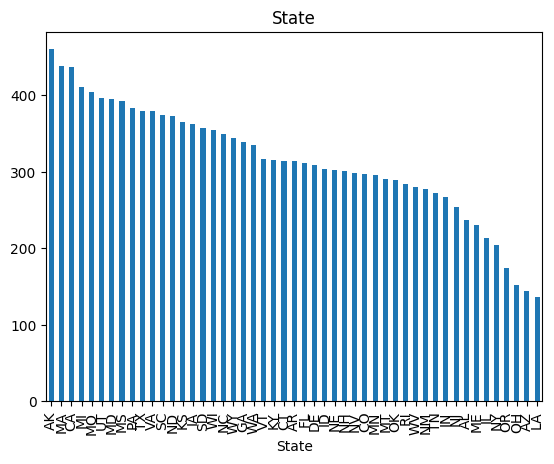

In [152]:
cat_col["State"].value_counts().plot(kind="bar")
plt.title("State")

We can see from the histogram that most of the data falls within the AK, MA, CA, AND MI states. These states likely have more listings compared to the other states.

### Univariate Analysis of Numerical Columns

In [153]:
num_col = data.select_dtypes(np.number)
num_col

,Bedroom,Bathroom,Area,PricePerSqft,LotArea,MarketEstimate,RentEstimate,ListedPrice
0,4,2.0,1614.0,148.64,0.3805,240600.0,1599.0,239900.0
3,3,3.0,2224.0,150.63,0.2600,336200.0,1932.0,335000.0
4,3,2.0,1225.0,204.08,NaN,222700.0,1679.0,250000.0
5,3,2.0,1564.0,96.55,0.2000,150500.0,1385.0,151000.0
6,3,2.0,1717.0,139.20,0.3800,238400.0,2125.0,239000.0
...,...,...,...,...,...,...,...,...
22674,3,3.0,2316.0,133.85,0.1500,306700.0,1724.0,310000.0
22675,3,3.0,2400.0,77.08,3.3500,184500.0,1999.0,185000.0
22676,2,1.0,1112.0,337.23,20.0000,368600.0,1500.0,375000.0
22679,3,2.0,2930.0,196.55,6.2300,558000.0,2749.0,575900.0


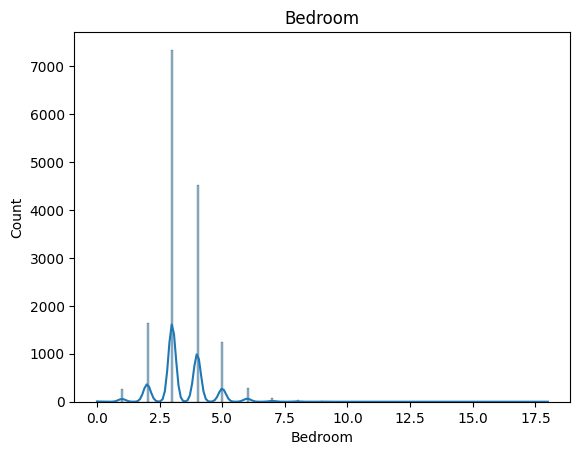

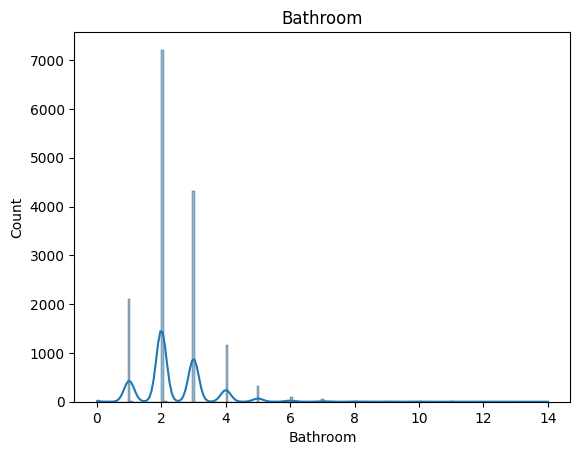

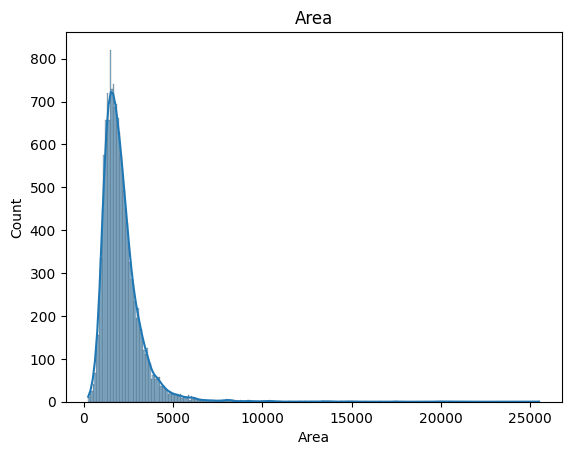

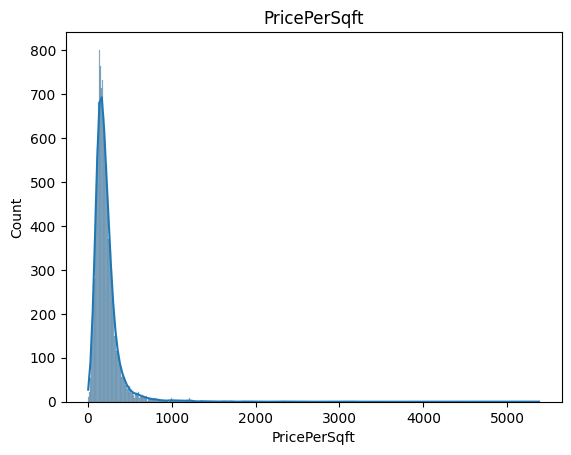

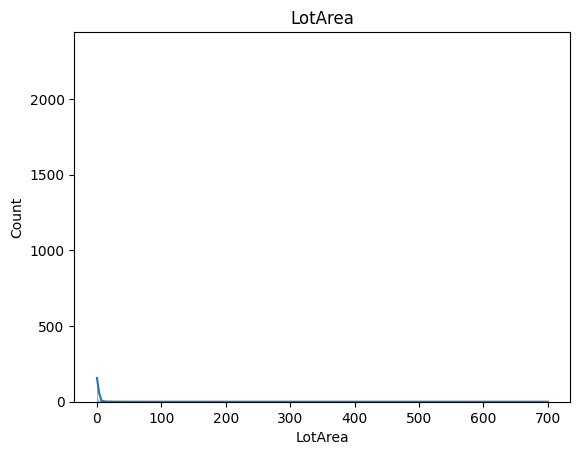

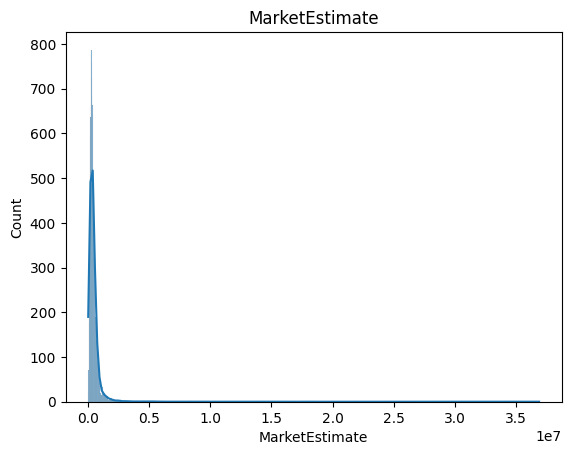

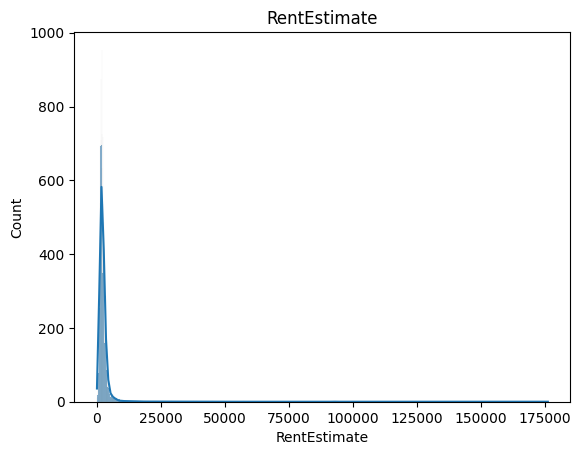

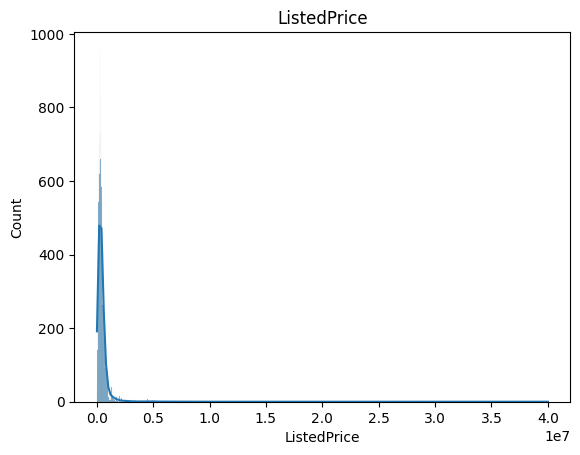

In [154]:
for column in num_col:
    plt.figure()
    sns.histplot(num_col[column], kde=True)
    plt.title(column)

#### Observations
- All columns appear to be right-skewed. This skewness was expected, as mentioned earlier, due to the presence of outliers and data with an extreme range. 
- Most listings seem to fall under an area of about 2000sqft, with a price per sqft around $200.
- The majority of listings feature 3 bedrooms and 2 bathrooms. This recurring pattern in the dataset indicates the typical house for residential properties.

These observations were expected due to the nature of the dataset, with how majority of the data centers around normal ranging houses.

### Correlation Matrix 

<Axes: >

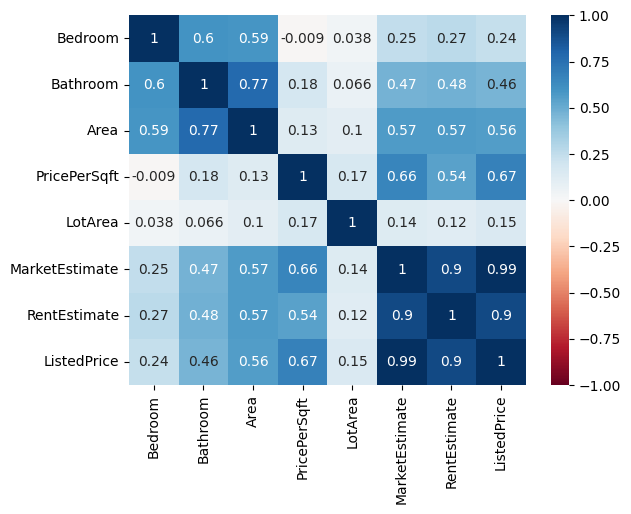

In [155]:
sns.heatmap(num_col.corr(), annot=True, vmin=-1, vmax=1, cmap="RdBu")

Observations
- Bathroom, Bedroom, Area, and PricePerSqft are features that seem to be highly correlated to the target, MarketEstimate

### Bivariate Analaysis of Numerical Columns (feature and target)

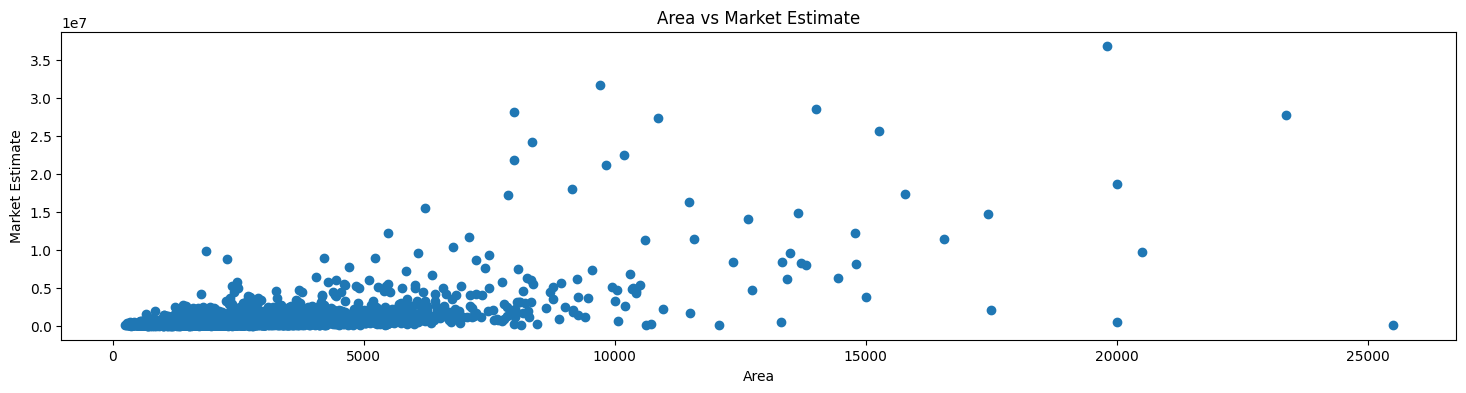

In [156]:
plt.figure(figsize=(18,4))  
plt.scatter(data["Area"], data["MarketEstimate"])
plt.title ("Area vs Market Estimate")
plt.xlabel("Area")
plt.ylabel("Market Estimate")
plt.show()

We can see that most of the data falls within the normal range house bracket with an area up to 7000sqft. However, there are other listings with the same amount of area, but a higher MarketEstimate and vice versa. This could be due to a number of external factors, like location.

### Building a Linear Regression Model

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [158]:
reg = LinearRegression()

Splitting data into train and test sets

In [159]:
x = data[["Area"]]
y = data["MarketEstimate"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Making predictions with the test set

In [160]:
reg.fit(x_train,y_train)
predictions = reg.predict(x_test)
predictions = predictions.round(2)
predictions

array([ -66294.33, 1270726.34,  398144.43, ..., -137602.1 ,  721844.17,
         45358.62])

Visualization of the model and predictions

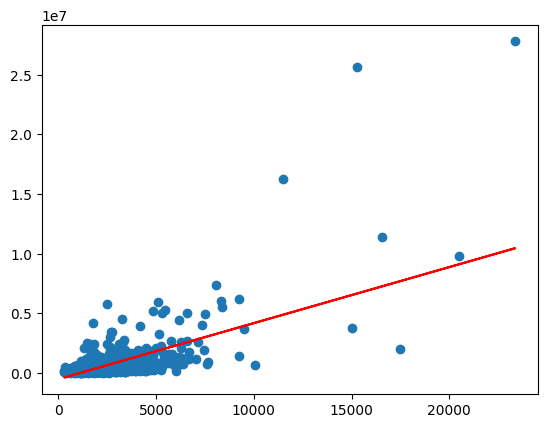

In [161]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, color="red")

### Measuring Model Accuracy

In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

error = mean_absolute_error(y_test, predictions).round(2)
error

305412.08

In [163]:
r_score = r2_score(y_test, predictions)
r_score

0.42369123000610753

In [164]:
data["MarketEstimate"].describe()

count    1.542300e+04
mean     4.819454e+05
std      1.000828e+06
min      1.570000e+04
25%      2.306500e+05
50%      3.419000e+05
75%      4.995000e+05
max      3.687690e+07
Name: MarketEstimate, dtype: float64

### Removing Outliers

I will try to remove the outliers from the dataset to see what impact removing the outliers have on the model.

In [165]:
Q1 = data["MarketEstimate"].quantile(0.25)
Q3 = data["MarketEstimate"].quantile(0.75)

IQR = Q3 - Q1
threshold = 1.5
cleaned = data[(data["MarketEstimate"] < Q1 - threshold * IQR) | (data["MarketEstimate"] > Q3 + threshold * IQR)]
cleaned

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PricePerSqft,LotArea,MarketEstimate,RentEstimate,ListedPrice
444,AL,Fairhope,Beaver Creek Dr,36532.0,4,5.0,4317.0,463.28,0.980000,1979700.0,7783.0,2000000.0
513,AK,Wasilla,E Vision View Dr,99654.0,7,6.0,6538.0,183.54,2.000000,1197200.0,6314.0,1200000.0
556,AK,Anchorage,Victor Rd,99515.0,4,4.0,6906.0,289.60,1.350000,1996700.0,6984.0,2000000.0
582,AK,Anchorage,W Dimond Blvd,99502.0,4,6.0,5888.0,280.23,3.540000,1652000.0,5917.0,1650000.0
620,AK,Anchorage,W 100th Ave,99515.0,4,3.0,3490.0,381.09,0.550000,1325200.0,4844.0,1330000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22612,WY,Weston,Trail Creek Rd,82731.0,4,2.0,2175.0,620.69,82.000000,1249700.0,6699.0,1350000.0
22616,WY,Jackson,E Hall Ave,83001.0,3,3.0,1800.0,1361.11,0.090000,2443100.0,7324.0,2450000.0
22653,WY,Sheridan,Prestwick Dr,82801.0,3,2.0,3484.0,340.13,0.484298,1184000.0,4607.0,1185000.0
22662,WY,Bedford,Deer Rd,83112.0,7,6.0,10041.0,492.98,5.000000,4781100.0,11856.0,4950000.0


In [166]:
x = cleaned[["Area"]]
y = cleaned["MarketEstimate"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

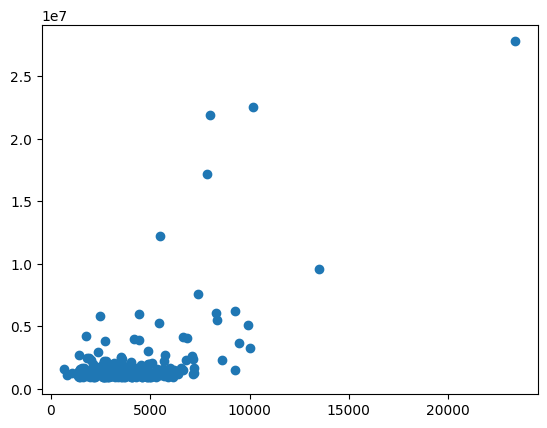

In [167]:
plt.scatter(x_test, y_test)

In [168]:
reg.fit(x_train, y_train)

LinearRegression()

In [169]:
predictions = reg.predict(x_test)
predictions = predictions.round(2)

In [170]:
error = mean_absolute_error(y_test, predictions)
error

1477865.995357143

In [171]:
r_score = r2_score(y_test, predictions)
r_score

0.3915228729714818

### Adding More Features

From the correlation matrix, we can see that "Bedroom", "Bathroom" and "PricePerSqft" are positively correlated with the target, Market Estimate. I will be adding these features to the model to investigate how the model's predictions change. 

In [172]:
x = data.iloc[:, 4:8]
y = data["MarketEstimate"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=None)

In [173]:
reg.fit(x_train, y_train)

LinearRegression()

In [174]:
predictions = reg.predict(x_test)
predictions = predictions.round(2)

In [175]:
error = mean_absolute_error(y_test, predictions)
error

226953.9930145867

In [176]:

r_score = r2_score(y_test, predictions)
r_score

0.6595451169850417

The linear regression model's performance metrics were assessed, revealing an initial mean absolute error (MAE) of 305412.08 and an R-squared (R2) score of 0.47. This indicated a level of inaccuracy in predictions, as reflected by the high MAE and a relatively low R2 score. The second approach of removing outliers resulted in a deterioration of performance. The MAE surged signifcicantly to 1477865.99 along with a lower strength of 0.39. This approach of did not improve the predictive ability of the model, but rather drastically increased the innaccuracies. On the contrary, the introduction of additional features to the model turned out to be a more successful strategy to increase the accuracy of the model. This is demonstrated with an increased R2 score of 0.66, and a lower MAE value signaling a reduction in prediction errors. 

In conclusion, the findings suggest that the model with more features, thereby incorporating additional data, considerably increased its predictive capabilities. 

On a side note, it is worth noting that the current model does not account for influential factors such as location, economic conditions, interest rates, and others, which could significantly impact MarketEstimate. Incorporating data pertaining to these factors could contribute to a more accurate and robust model for predicting MarketEstimate.
